# Laboratory of Computational Physics mod.B

## First assignment

### Group name: 
LoCPdown
### Components:
* Campesan Giulia (2027592)
* Faorlin Tommaso (2021857)
* Marcomini Alessandro 

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm
import pandas as pd

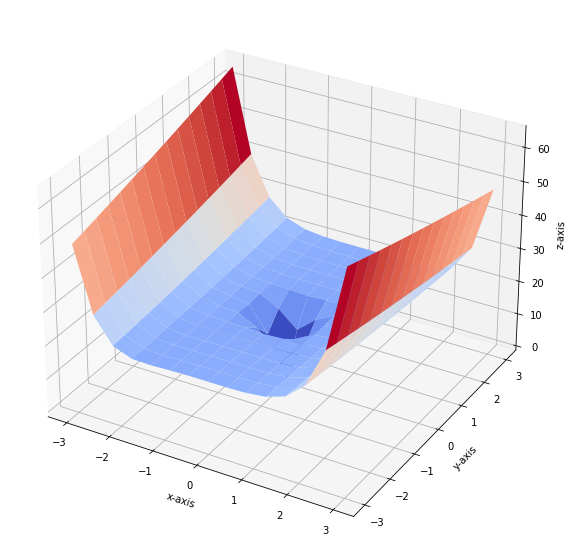

In [2]:
#function parameters
b = 20
q = 0.1
w = 10

#descent parameters
n_epochs = 5000


fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

def surf_1(x, y, b, q, w):
    return b*(1-np.exp(-.5*w*(x**2+y**2)))+.5*q*(-x**3+y)**2

def grad_surf_1(params): 
    x=params[0]
    y=params[1]
    grad_x= b*np.exp(-0.5*w*(x**2+y**2))*w*x-3*q*x**2*(-x**3+y)
    grad_y= b*np.exp(-0.5*w*(x**2+y**2))*w*y+q*(-x**3+y)
    return [grad_x,grad_y]


X = np.linspace(-3, 3, 15)
Y = np.linspace(-3, 3, 15)
xm, ym = np.meshgrid(X, Y)
Z = surf_1(xm, ym, b, q, w)

surf = ax.plot_surface(xm,ym,Z, cmap = cm.coolwarm)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()


In the following cell we import the gradient descent methods from the notebook we were given. 
We have set the following values for the learning rates:
* gd, gd with momentum, nag: $\eta=10^{-4}$,
* RMS prop, Adam: $\eta=10^{-3}$.

The learning rate for RMSprop and Adam can be set at a higher value wrt the one of the others, thank to the fact that they implement an adaptive learning rate.

The values for $\beta$, $\gamma$ and $\epsilon$ are the one reported in the paper [Mehta]:
* $\beta$=0.99,
* $\gamma$=0.9,
* $\epsilon=10^{-8}$.

WWe have set the number of epo

In [3]:
def gd(grad, init, n_epochs, eta = 10**-4, noise_strength = 0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def gd_with_mom(grad, init, n_epochs, eta = 10**-4, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def NAG(grad, init, n_epochs, eta = 10**-4, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


def rms_prop(grad, init, n_epochs, eta= 10**-3, beta=0.9, epsilon=10**-8, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
                        
def adams(grad, init, n_epochs, eta = 10**-3, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj


fun_dict = {
    'vanilla'  : gd,
    'momentum' : gd_with_mom,
    'nag'      : NAG,
    'rms'      : rms_prop,
    'adams'    : adams
    }


In [4]:
trajectories = []
avgs = []


for func_key in tqdm(fun_dict):
    print('Gradient: ', func_key)
    traj_list = []
    avg = []
    init = [0,0]
    for i in range(len(X)):
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            
            traj_list.append(fun_dict[func_key](grad_surf_1, init, n_epochs))
    
   
    
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)
    

    for e in tqdm(range(n_epochs+1)):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_1(x, y, b, q, w)
        temp /= (len(X)*len(Y))
        avg.append(temp)
    avgs.append(avg)
   

Gradient:  vanilla



Gradient:  momentum



Gradient:  nag



Gradient:  rms



Gradient:  adams


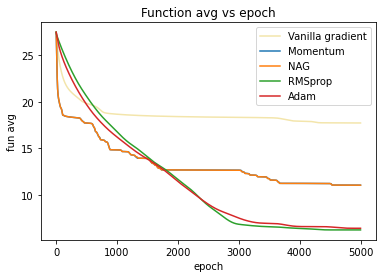

In [5]:
plt.plot(avgs[0], label = 'Vanilla gradient', color = '#f3e5ab')
plt.plot(avgs[1], label = 'Momentum')
plt.plot(avgs[2], label = 'NAG')
plt.plot(avgs[3], label = 'RMSprop')
plt.plot(avgs[4], label = 'Adam')
plt.title('Function avg vs epoch')
plt.xlabel('epoch')
plt.ylabel('fun avg')
plt.legend()

plt.show()

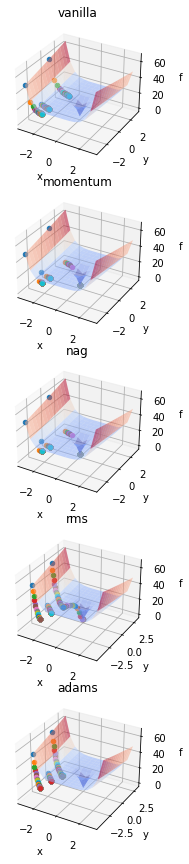

In [7]:
fig = plt.figure(figsize=(10,15))

method_list = []
for key in fun_dict:
    method_list.append(key)

for i in range(5):
    
    method=i
    ax = fig.add_subplot(5,1, i+1, projection='3d') 
    ax.set_title(method_list[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f')



    
    sample_traj_1 = []
    sample_traj_2 = []
    sample_traj_3 = []


    #first index = method (e.g. 0 = vanilla)
    for i in range(len(trajectories[method][0][0])):
        x = np.asarray([trajectories[method][0][0][i][0]])
        y = np.asarray([trajectories[method][0][0][i][1]])
        temp = surf_1(trajectories[method][0][0][i][0], trajectories[method][0][0][i][1], b, q, w)
        z = np.asarray([temp])
        point = np.concatenate((x, y, z), axis=0)
        sample_traj_1.append(point)
    for i in range(len(trajectories[method][0][8])):
        x = np.asarray([trajectories[method][0][8][i][0]])
        y = np.asarray([trajectories[method][0][8][i][1]])
        temp = surf_1(trajectories[method][0][8][i][0], trajectories[method][0][8][i][1], b, q, w)
        z = np.asarray([temp])
        point = np.concatenate((x, y, z), axis=0)
        sample_traj_2.append(point)
    for i in range(len(trajectories[method][2][2])):
        x = np.asarray([trajectories[method][2][2][i][0]])
        y = np.asarray([trajectories[method][2][2][i][1]])
        temp = surf_1(trajectories[method][2][2][i][0], trajectories[method][2][2][i][1], b, q, w)
        z = np.asarray([temp])
        point = np.concatenate((x, y, z), axis=0)
        sample_traj_3.append(point)

    for i in range(int(len(sample_traj_1)/100)): 
        ax.scatter(sample_traj_1[i*100][0], sample_traj_1[i*100][1], sample_traj_1[i*100][2])
    for i in range(int(len(sample_traj_2)/100)):        
        ax.scatter(sample_traj_2[i*100][0], sample_traj_2[i*100][1], sample_traj_2[i*100][2])
    for i in range(int(len(sample_traj_3)/100)):       
        ax.scatter(sample_traj_3[i*100][0], sample_traj_3[i*100][1], sample_traj_3[i*100][2])

    X = np.linspace(-3, 3, 15)
    Y = np.linspace(-3, 3, 15)
    xm, ym = np.meshgrid(X, Y)
    Z = surf_1(xm, ym, b, q, w)

    surf = ax.plot_surface(xm,ym,Z, cmap = cm.coolwarm, alpha=0.5)

plt.show()   

In [18]:
#fig = plt.figure(figsize=(15,10))
#ax6 = fig.gca(projection='3d')
ax6.set_title('')
ax6.set_xlabel('x')
ax6.set_ylabel('y')
ax6.set_zlabel('f')

#function parameter
q2 = 6


def surf_2(x, y, q2):
    return 1.+.5*q2*(x**2+y**2)-np.cos(2*np.pi*(x*y-y**2))

def grad_surf_2(params):
    x=params[0]
    y=params[1]
    grad_x= q2*x+2*np.pi*y*np.sin(2*np.pi*(x*y-y**2))
    grad_y= q2*y+2*np.pi*(x-2.*y)*np.sin(2*np.pi*(x*y-y**2))
    return [grad_x,grad_y]

X = np.linspace(-3, 3, 15)

Y = np.linspace(-3, 3, 15)
xm, ym = np.meshgrid(X, Y)
Z = surf_2(xm, ym, q2)

surf = ax6.plot_surface(xm,ym,Z, cmap = cm.coolwarm)

ax6.set_xlabel('x-axis')
ax6.set_ylabel('y-axis')
ax6.set_zlabel('z-axis')

plt.show()

In [19]:
trajectories = []
avgs = []
n_epochs = 1000
l_rates = [10**-6,10**-5,10**-4,10**-3,10**-2]

#external cycle over learning rates
for rate in tqdm(l_rates):
    print('Learning rate: ', rate)
    traj_list = []
    avg = []
    init = [0,0]
    
    #looping over cartesian points 
    #cycle over X
    for i in range(len(X)):
        #cycle over Y
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            traj_list.append(adams(grad_surf_2, init,n_epochs, rate))
            
       
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)
    
    #loop for average calculation
    for e in tqdm(range(n_epochs+1)):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_2(x, y, q2)
        temp /= len(X)*len(Y)
        avg.append(temp)
    avgs.append(avg)

Learning rate:  1e-06



Learning rate:  1e-05



Learning rate:  0.0001



Learning rate:  0.001



Learning rate:  0.01


<IPython.core.display.Javascript object>


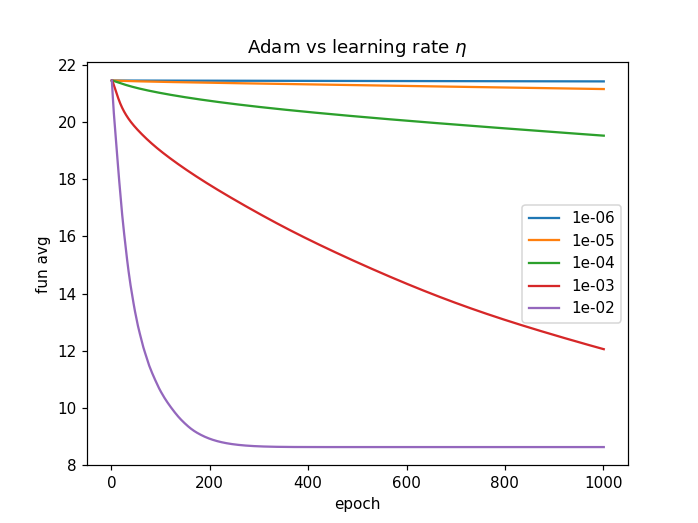

In [20]:
plt.close()

from matplotlib._mathtext_data import (latex_to_bakoma, latex_to_standard,
                                       tex2uni, latex_to_cmex,
                                       stix_virtual_fonts)
x_epoch = np.arange(1,1002,1)

plt.plot(x_epoch,avgs[0], label = '1e-06')
plt.plot(x_epoch,avgs[1], label = '1e-05')
plt.plot(x_epoch,avgs[2], label = '1e-04')
plt.plot(x_epoch,avgs[3], label = '1e-03')
plt.plot(x_epoch,avgs[4], label = '1e-02')

plt.legend()

plt.xlabel('epoch')
plt.ylabel('fun avg')
plt.title('Adam vs learning rate $\eta$ ')

plt.show()

In [21]:

#CUT (*) (Ale)


for i in range(len(sample_traj_1)):        
    ax.scatter(sample_traj_1[i][0], sample_traj_1[i][1], sample_traj_1[i][2])
for i in range(len(sample_traj_2)):        
    ax.scatter(sample_traj_2[i][0], sample_traj_2[i][1], sample_traj_2[i][2])
for i in range(len(sample_traj_3)):        
    ax.scatter(sample_traj_3[i][0], sample_traj_3[i][1], sample_traj_3[i][2])
        
X = np.linspace(-3, 3, 15)
Y = np.linspace(-3, 3, 15)
xm, ym = np.meshgrid(X, Y)
Z = surf_1(xm, ym, b, q, w)

surf = ax.plot_surface(xm,ym,Z, cmap = cm.coolwarm, alpha = 0.5)

ax.view_init(60, 35)

plt.show()